<a href="https://colab.research.google.com/github/haris-lutafullah/Research-Work/blob/main/Traffic_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Importing Library Files**</p>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**File Loading**</p>

In [2]:
# Load the dataset
file_path = '/content/Metro_Interstate_Traffic_Volume.csv'
data = pd.read_csv(file_path)

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Data Pre-Processing**</p>

**Label Encoding**

In [3]:
# Step 1: Label Encoding for categorical columns
label_encoder = LabelEncoder()
for column in ['holiday', 'weather_main', 'weather_description']:
    data[column] = label_encoder.fit_transform(data[column])

**Date-Time Conversions**

In [4]:
# Step 2: Convert 'date_time' column to datetime format
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)

**Normalize Dataset**

In [5]:
# Step 3: Normalize the dataset (excluding 'date_time')
scaler = MinMaxScaler()
numeric_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


**Creating Lag Features**

In [6]:
# Step 4: Create Lag Features (example: 1-hour lag for each numeric column)
for column in numeric_columns:
    data[f'{column}_lag1'] = data[column].shift(1)

# Drop any rows with NaN values resulting from the shift
data.dropna(inplace=True)

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Implementing LB LSTM**</p>

In [7]:
# Step 5: Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Step 6: Prepare the data for LSTM input
# Separate features and target variable
X_train = train_data.drop('traffic_volume', axis=1).values
y_train = train_data['traffic_volume'].values
X_test = test_data.drop('traffic_volume', axis=1).values
y_test = test_data['traffic_volume'].values

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 7: Build the LB-LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                     verbose=1)


Epoch 1/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0644 - val_loss: 0.0114
Epoch 2/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0173 - val_loss: 0.0116
Epoch 3/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0163 - val_loss: 0.0111
Epoch 4/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0157 - val_loss: 0.0109
Epoch 5/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0151 - val_loss: 0.0118
Epoch 6/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0151 - val_loss: 0.0118
Epoch 7/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0150 - val_loss: 0.0111
Epoch 8/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0151 - val_loss: 0.0147
Epoch 9/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0163 - val_loss: 0.0114
Epoch 10/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0144 - val_loss: 0.0113
Epoch 11/100
965/965 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0151 - val_loss: 0.0111
Epoch 12/100
965/965 ━━━━━━━━━━━━━━━━━━

**Validations**

In [12]:
# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100

# Calculate metrics in percentage (relative to the mean of y_test)
y_test_mean = np.mean(y_test)
mse_percentage = (mse / y_test_mean) * 100
rmse_percentage = (rmse / y_test_mean) * 100
mae_percentage = (mae / y_test_mean) * 100
r2_percentage = (r2) * 100  # Convert R^2 to percentage

# Print the evaluation metrics
print("Performance Metrics (Absolute):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

print("\nPerformance Metrics (Percentage):")
print(f"MSE (% of mean): {mse_percentage}%")
print(f"RMSE (% of mean): {rmse_percentage}%")
print(f"MAE (% of mean): {mae_percentage}%")
print(f"MAPE (% of mean): {mape}%")
print(f"R2 (% of mean): {r2_percentage}%")


302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Performance Metrics (Absolute):
Mean Squared Error (MSE): 0.00931374813377833
Root Mean Squared Error (RMSE): 0.09650776203901078
Mean Absolute Error (MAE): 0.06939781514906214
R^2 Score: 0.8725079489179076
Mean Absolute Percentage Error (MAPE): 29.832793390187412%

Performance Metrics (Percentage):
MSE (% of mean): 2.0828635215987994%
RMSE (% of mean): 21.582341954596927%
MAE (% of mean): 15.51965713227846%
MAPE (% of mean): 29.832793390187412%
R2 (% of mean): 87.25079489179076%


**Plots**

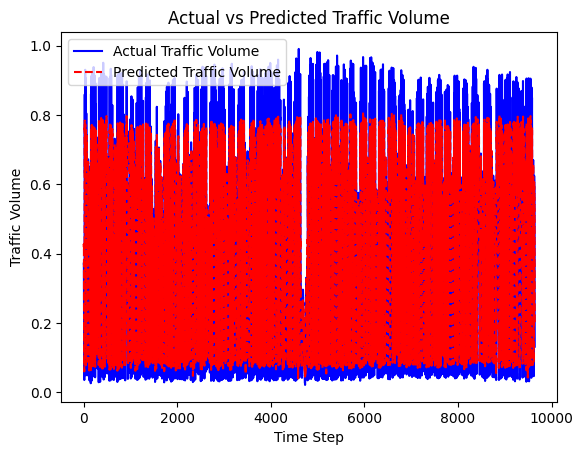

Text(0, 0.5, 'Residuals')

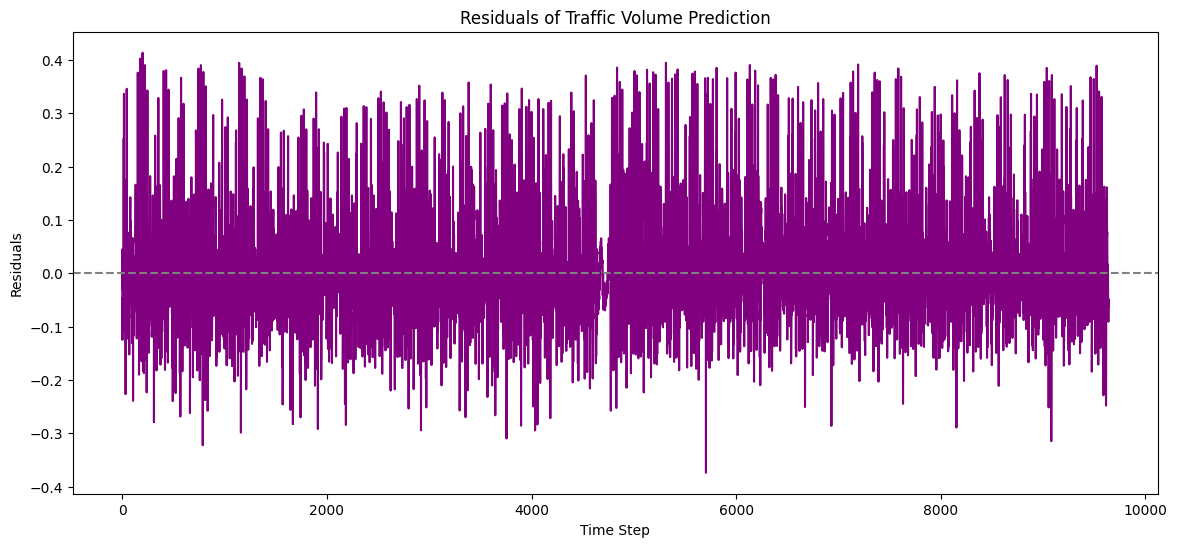

In [15]:
# Plotting actual vs. predicted values
plt.plot(y_test, label='Actual Traffic Volume', color='blue')
plt.plot(y_pred, label='Predicted Traffic Volume', color='red', linestyle='dashed')
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Time Step")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

# Plot residuals (errors) if desired
plt.figure(figsize=(14, 6))
plt.plot(y_test - y_pred.flatten(), label='Residuals (Actual - Predicted)', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residuals of Traffic Volume Prediction")
plt.xlabel("Time Step")
plt.ylabel("Residuals")